In [12]:
import xarray as xr 
import numpy as np 
import os 
# 数据处理
## 获取文件夹名称 和 所谓文件路径
init_path = r'F:\CPSv3'
all_folders_path = os.listdir(init_path)
sgl_years_files_path = [ (init_path + '\\' + folder) for folder in all_folders_path ]
all_files_path =  []
for path in sgl_years_files_path:
    single_yeas_all_data = os.listdir(path)
    all_files_path.append(single_yeas_all_data)


In [13]:
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
train_data = xr.open_dataset(sgl_years_files_path[0] + "\\"+ str(all_files_path[0][0]), engine='netcdf4')
test_data = xr.open_dataset(sgl_years_files_path[0] + "\\"+ str(all_files_path[0][4]), engine='netcdf4')
lon_max = test_data.longitude.values.max()
lon_min = test_data.longitude.values.min()
lat_max = test_data.latitude.values.max()
lat_min = test_data.latitude.values.min()

pre_data = test_data.values
lon = test_data.longitude.values
lat = test_data.latitude.values
time = test_data.time.values
# print(test_data)
# print(train_data)

Exception ignored in: <function BaseGeometry.__del__ at 0x0000026F17D572E0>
Traceback (most recent call last):
  File "d:\myAnaconda_base\envs\geocat\Lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "d:\myAnaconda_base\envs\geocat\Lib\site-packages\shapely\geometry\base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
OSError: exception: access violation reading 0xFFFFFFFFFFFFFFFF


In [5]:
all_time = test_data.time  

In [ ]:
import requests
import json 
import geopandas as gpd

# 发送请求获取数据.  
url = r"https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json"
response = requests.get(url)
data = response.json()               
with open("china_geojson.json",'w') as f:
    json.dump(data,f) 
    print("OK!")


OK!


In [7]:
#  将 cft格式进行转换 
data = xr.open_dataset(sgl_years_files_path[0]+"\\" +  all_files_path[0][0])
time = [data.time.values[i].strftime('%Y-%m-%d') for i in range(len(data.time.values))]
print(time)  # 输出时间序列


['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12', '2013-01-13', '2013-01-14', '2013-01-15', '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20', '2013-01-21', '2013-01-22', '2013-01-23', '2013-01-24', '2013-01-25', '2013-01-26', '2013-01-27', '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01', '2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17', '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25', '2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01', '2013-03-02']


In [32]:
lon = test_data.longitude.values
lat = test_data.latitude.values
pre = test_data.PRECT.mean(dim='time').values
print(lon)
print(lat)

[ 70.19999695  70.65000153  71.09999847  71.55000305  72.
  72.44999695  72.90000153  73.34999847  73.80000305  74.25
  74.69999695  75.15000153  75.59999847  76.05000305  76.5
  76.94999695  77.40000153  77.84999847  78.30000305  78.75
  79.19999695  79.65000153  80.09999847  80.55000305  81.
  81.44999695  81.90000153  82.34999847  82.80000305  83.25
  83.69999695  84.15000153  84.59999847  85.05000305  85.5
  85.94999695  86.40000153  86.84999847  87.30000305  87.75
  88.19999695  88.65000153  89.09999847  89.55000305  90.
  90.44999695  90.90000153  91.34999847  91.80000305  92.25
  92.69999695  93.15000153  93.59999847  94.05000305  94.5
  94.94999695  95.40000153  95.84999847  96.30000305  96.75
  97.19999695  97.65000153  98.09999847  98.55000305  99.
  99.44999695  99.90000153 100.34999847 100.80000305 101.25
 101.69999695 102.15000153 102.59999847 103.05000305 103.5
 103.94999695 104.40000153 104.84999847 105.30000305 105.75
 106.19999695 106.65000153 107.09999847 107.55000305

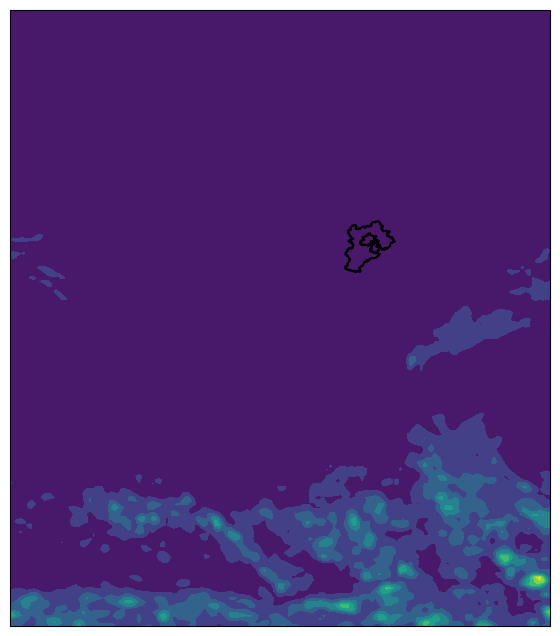

In [46]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps, draw_map

beijing = get_adm_maps(province='北京市', only_polygon=True, record='first')
tianjin = get_adm_maps(province='天津市', only_polygon=True, record='first')
hebei = get_adm_maps(province='河北省', only_polygon=True, record='first')

fig = plt.figure(figsize=(10,8))  # 改变图像大小以适应显示放大区域
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 设置地图范围以放大北京、天津和河北地区
ax.contourf(lon,lat,pre,transform=ccrs.PlateCarree())
draw_map(beijing, ax=ax, color='red', alpha=0.5)
draw_map(tianjin,ax=ax)
draw_map(hebei,ax=ax)
